# **WALMART (Capstone Project)**
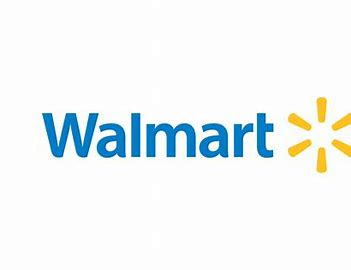

* Importing primary libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* We will load the data

In [5]:
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

--> Basic EDA and Data Cleaning
* Checking Dataset information of data. 
* We will check the duplicates and null values in the dataset.
* Checking Outliers in the Dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

No null and duplicated values present in the dataset.

We have to convert Date column data type from object to desirable data type.

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format= 'mixed')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')
df['Store'] = df['Store'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 315.9 KB


We will plot a heatmap to see correlation in data

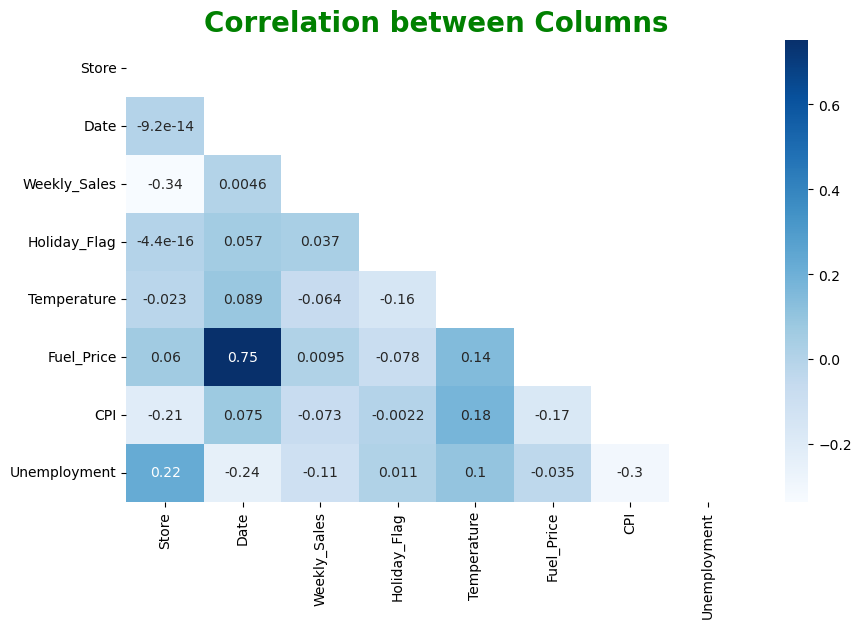

In [14]:
plt.figure(figsize=(10,6)) 
heatmap_data = df.corr() 
mask = np.triu(np.ones_like(heatmap_data, dtype=bool)) 
sns.heatmap(heatmap_data,annot=True,cmap='Blues',mask = mask) 
plt.title("Correlation between Columns",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.show()

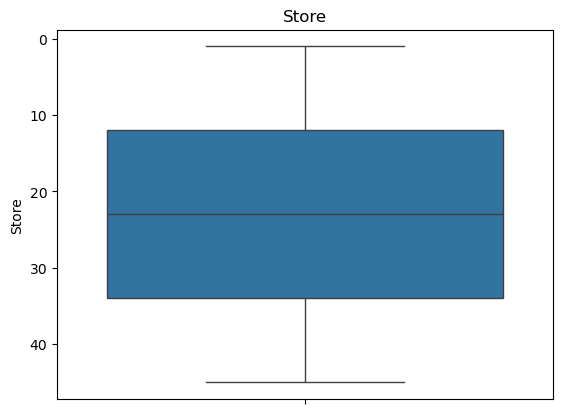

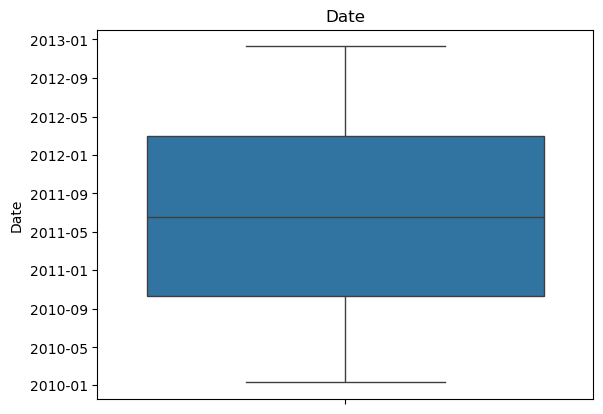

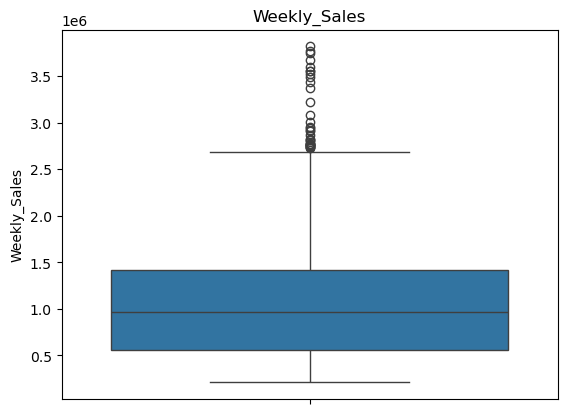

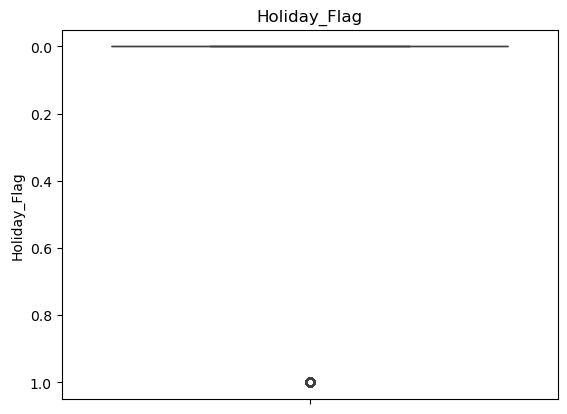

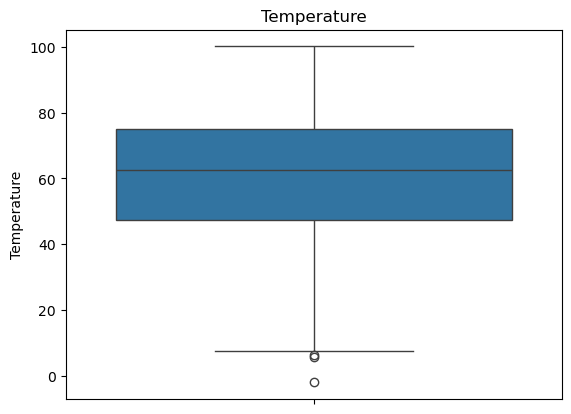

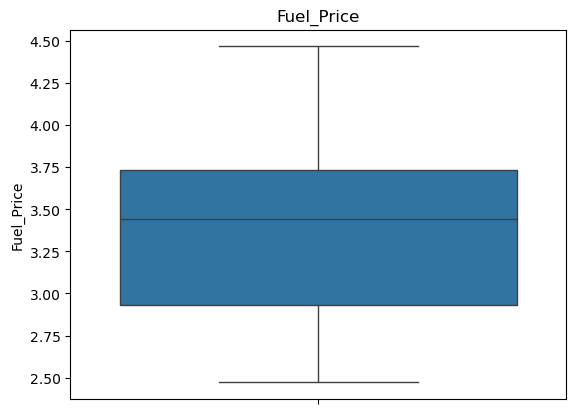

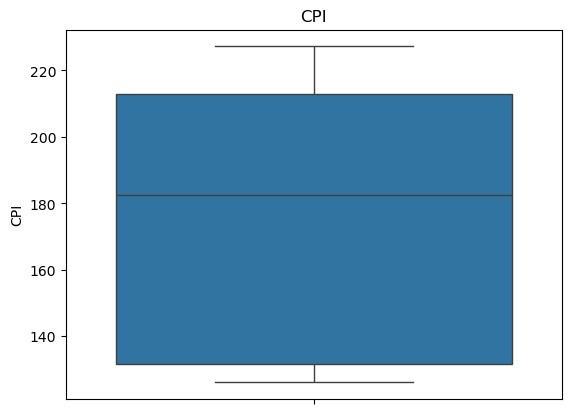

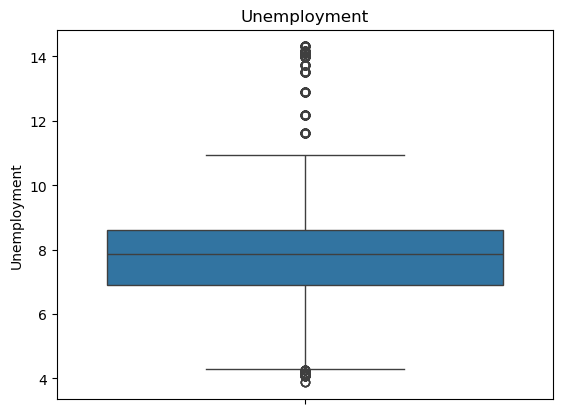

In [15]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

We have outliers in weekly_sales and unemployment columns.
So we will treat our outliers.

In [17]:
q1 = df['Weekly_Sales'].quantile(0.25)
q3 = df['Weekly_Sales'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
filt = ((df['Weekly_Sales'] <= upper_limit) & (df['Weekly_Sales'] >= lower_limit))
df = df[filt]

In [18]:
df

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90            0        42.31       2.572   
1        1 2010-12-02    1641957.44            1        38.51       2.548   
2        1 2010-02-19    1611968.17            0        39.93       2.514   
3        1 2010-02-26    1409727.59            0        46.63       2.561   
4        1 2010-05-03    1554806.68            0        46.50       2.625   
...    ...        ...           ...          ...          ...         ...   
6430    45 2012-09-28     713173.95            0        64.88       3.997   
6431    45 2012-05-10     733455.07            0        64.89       3.985   
6432    45 2012-12-10     734464.36            0        54.47       4.000   
6433    45 2012-10-19     718125.53            0        56.47       3.969   
6434    45 2012-10-26     760281.43            0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6401 rows x 8 columns]

# Questions
**a. If the weekly sales are affected by the unemployment rate, if yes - which stores  are suffering the most**?

In [20]:
# We need to check correlation between weekly sales and unemployment rate.
coef_corr = df["Weekly_Sales"].corr(df["Unemployment"])
print("The correlation coeficient of weekly sales and unemployment is: ",coef_corr)

The correlation coeficient of weekly sales and unemployment is:  -0.10429750912578391


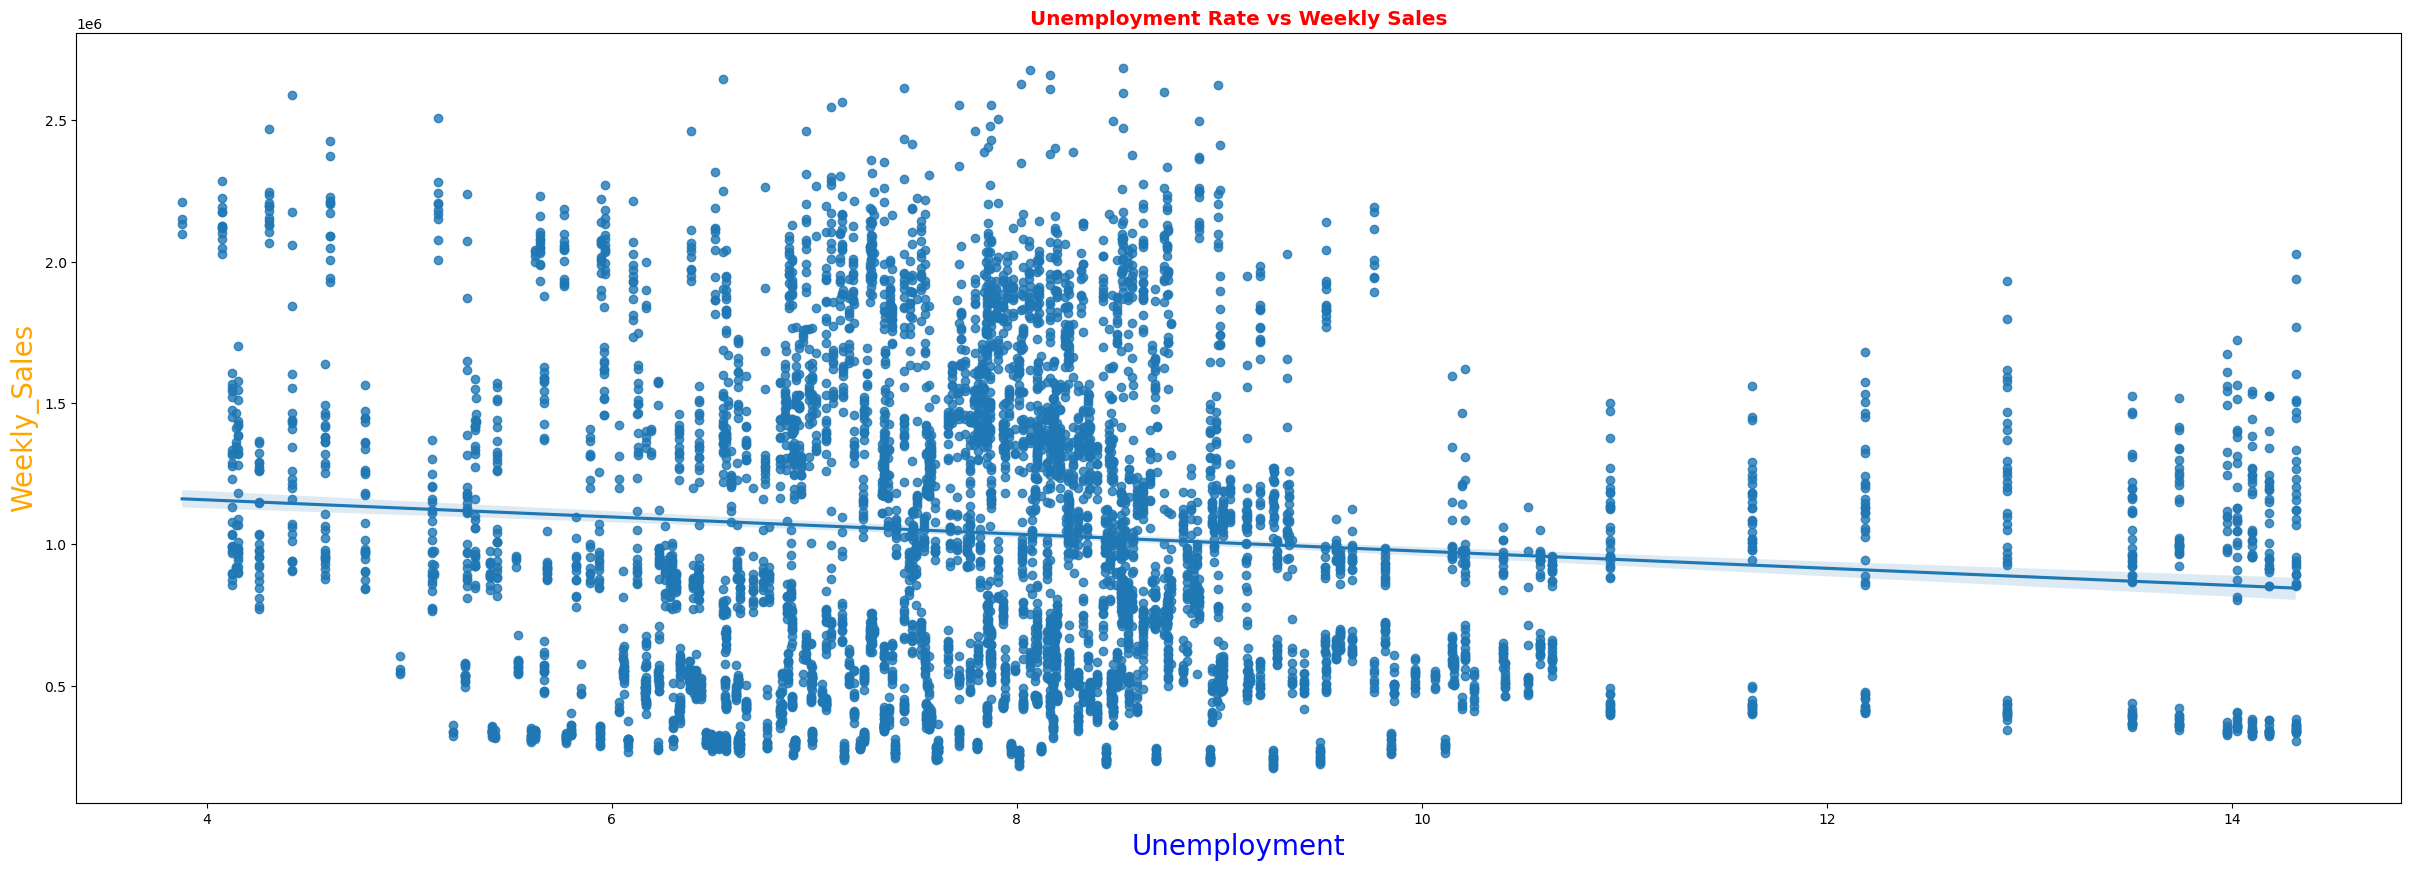

In [21]:
# We will plot a regression plot for analysis.
plt.figure(figsize = (30,10))
sns.regplot(data = df, x = "Unemployment", y = "Weekly_Sales")
plt.title("Unemployment Rate vs Weekly Sales", fontdict = {"fontsize":"x-large", "color":"red", "fontweight":"bold"})
plt.xlabel("Unemployment", color = "blue", fontweight = "normal", fontsize = 20 )
plt.ylabel("Weekly_Sales", color = "orange", fontweight = "normal", fontsize = 20 )
plt.show()

    Store  Correlation
37     38    -0.785290
43     44    -0.780076
3       4    -0.639563
12     13    -0.400254
38     39    -0.384681
41     42    -0.356355
40     41    -0.350630
16     17    -0.263600
2       3    -0.230413
36     37    -0.221287
4       5    -0.207043
42     43    -0.201954
8       9    -0.191534
6       7    -0.165382
22     23    -0.125490
39     40    -0.112528
19     20    -0.109391
31     32    -0.099455
0       1    -0.097955
15     16    -0.070864
25     26    -0.066899
30     31    -0.064738
7       8    -0.052580
10     11    -0.020339
23     24    -0.012261
11     12    -0.009286
24     25    -0.004958
44     45    -0.004041
26     27    -0.002535
5       6     0.016833
33     34     0.017010
21     22     0.039043
1       2     0.054288
14     15     0.078905
28     29     0.084682
32     33     0.101175
18     19     0.101464
27     28     0.136671
17     18     0.139179
9      10     0.186979
29     30     0.201862
20     21     0.218367
13     14  

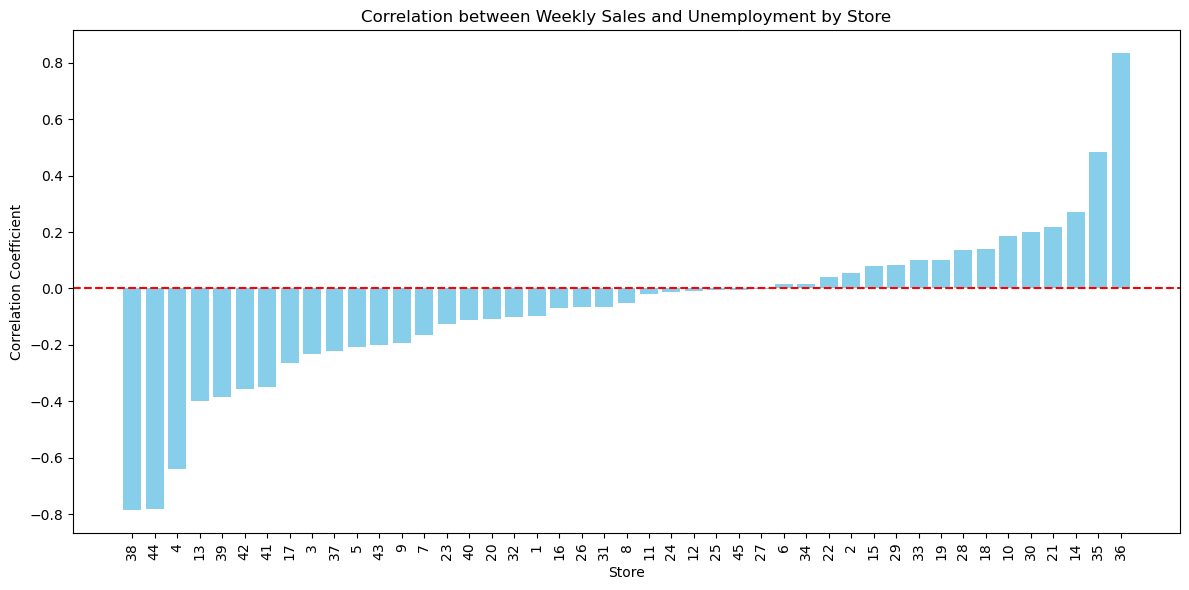

In [22]:
# Finding which store suffering the most

store_corr = {}

for store_id in df['Store'].unique():
    store_data = df[df['Store'] == store_id]
    corr = store_data['Weekly_Sales'].corr(store_data['Unemployment'])
    store_corr[store_id] = corr
corr_df = pd.DataFrame(list(store_corr.items()), columns=['Store', 'Correlation'])
corr_df_sorted = corr_df.sort_values(by='Correlation')
print(corr_df_sorted)
plt.figure(figsize=(12, 6))
plt.bar(corr_df_sorted['Store'].astype(str), corr_df_sorted['Correlation'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Correlation between Weekly Sales and Unemployment by Store")
plt.xlabel("Store")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

In [24]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

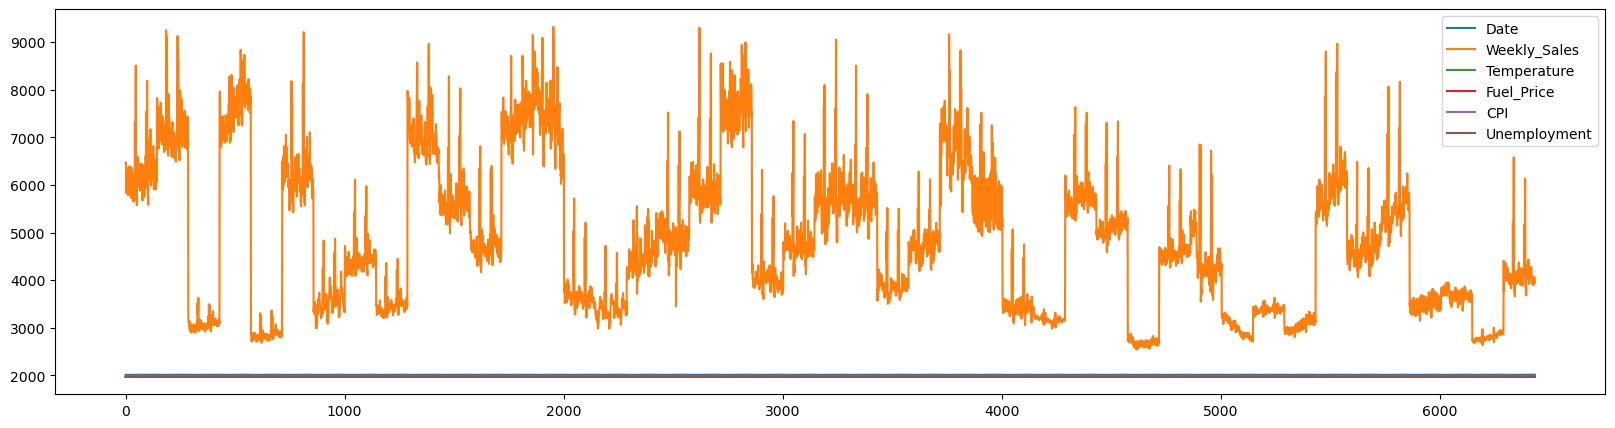

In [25]:
df.plot(figsize = (20,5))
plt.show()

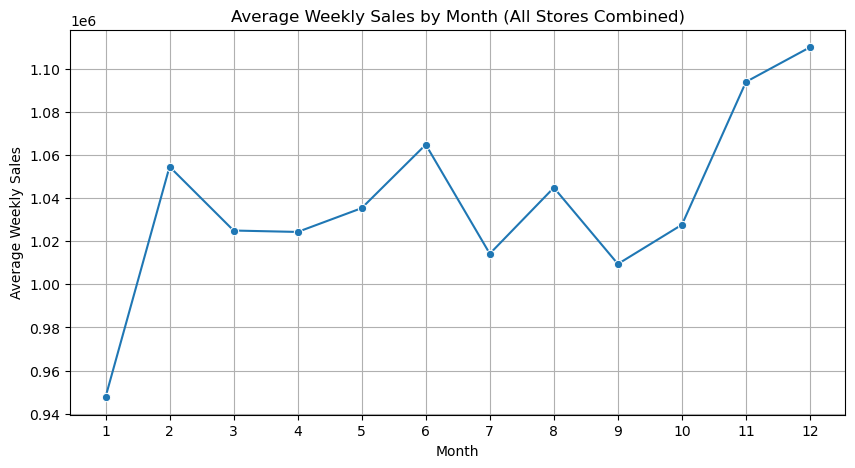

In [26]:
# Extract time components
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Group by Month to check for seasonal trends
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly average sales
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Average Weekly Sales by Month (All Stores Combined)")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()



 **c. Does temperature affect the weekly sales in any manner?**

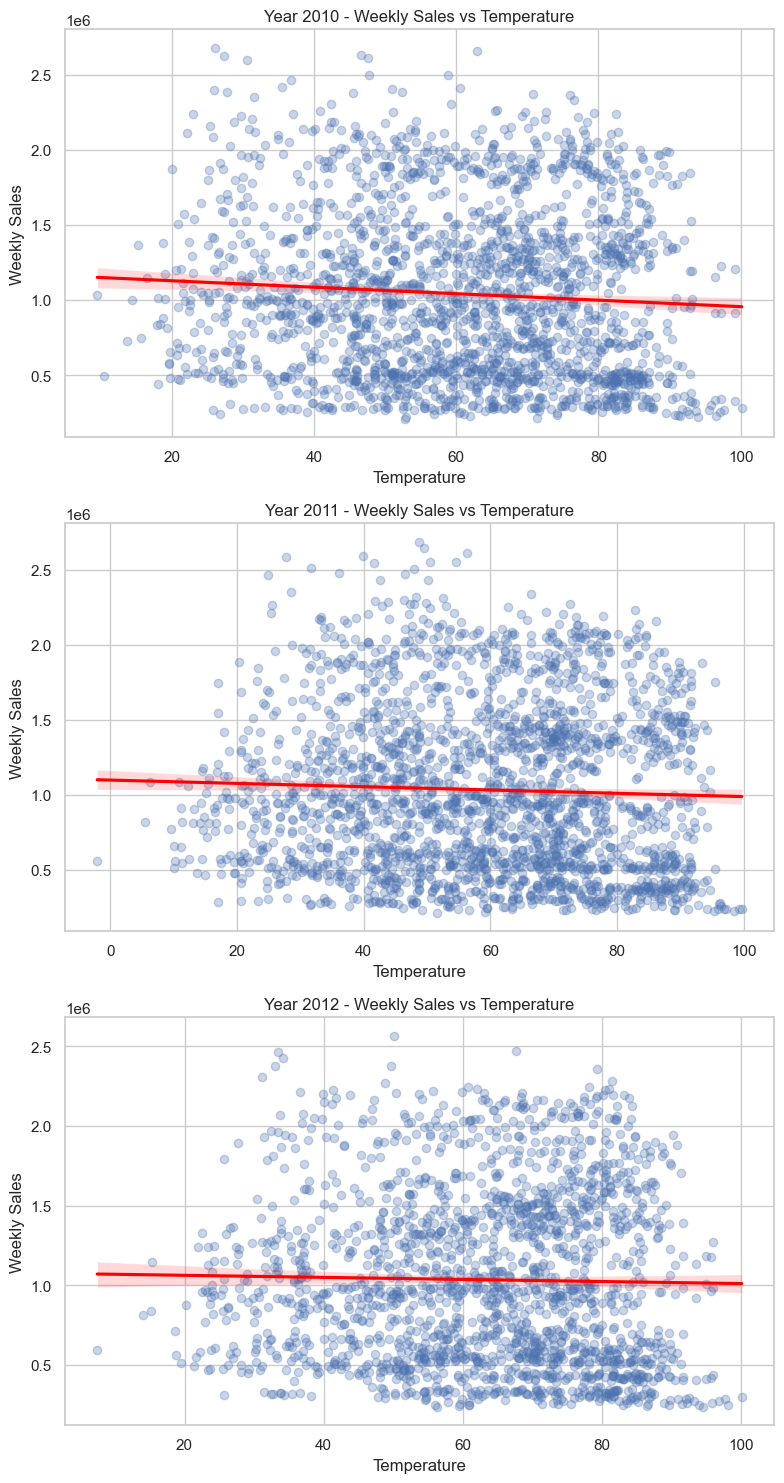

In [28]:
# We will use the regression plot to visualize the correaltion between the temperature and weekly_sales.
sns.set(style="whitegrid")
unique_years = sorted(df['Year'].unique())
fig, axes = plt.subplots(nrows=len(unique_years), figsize=(8, 5 * len(unique_years)))

for i, year in enumerate(unique_years):
    data_year = df[df['Year'] == year]
    sns.regplot(
        x='Temperature',
        y='Weekly_Sales',
        data=data_year,
        ax=axes[i],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f"Year {year} - Weekly Sales vs Temperature")
    axes[i].set_xlabel("Temperature")
    axes[i].set_ylabel("Weekly Sales")

plt.tight_layout()
plt.show()

 **d. How is the Consumer Price index affecting the weekly sales of various stores?**

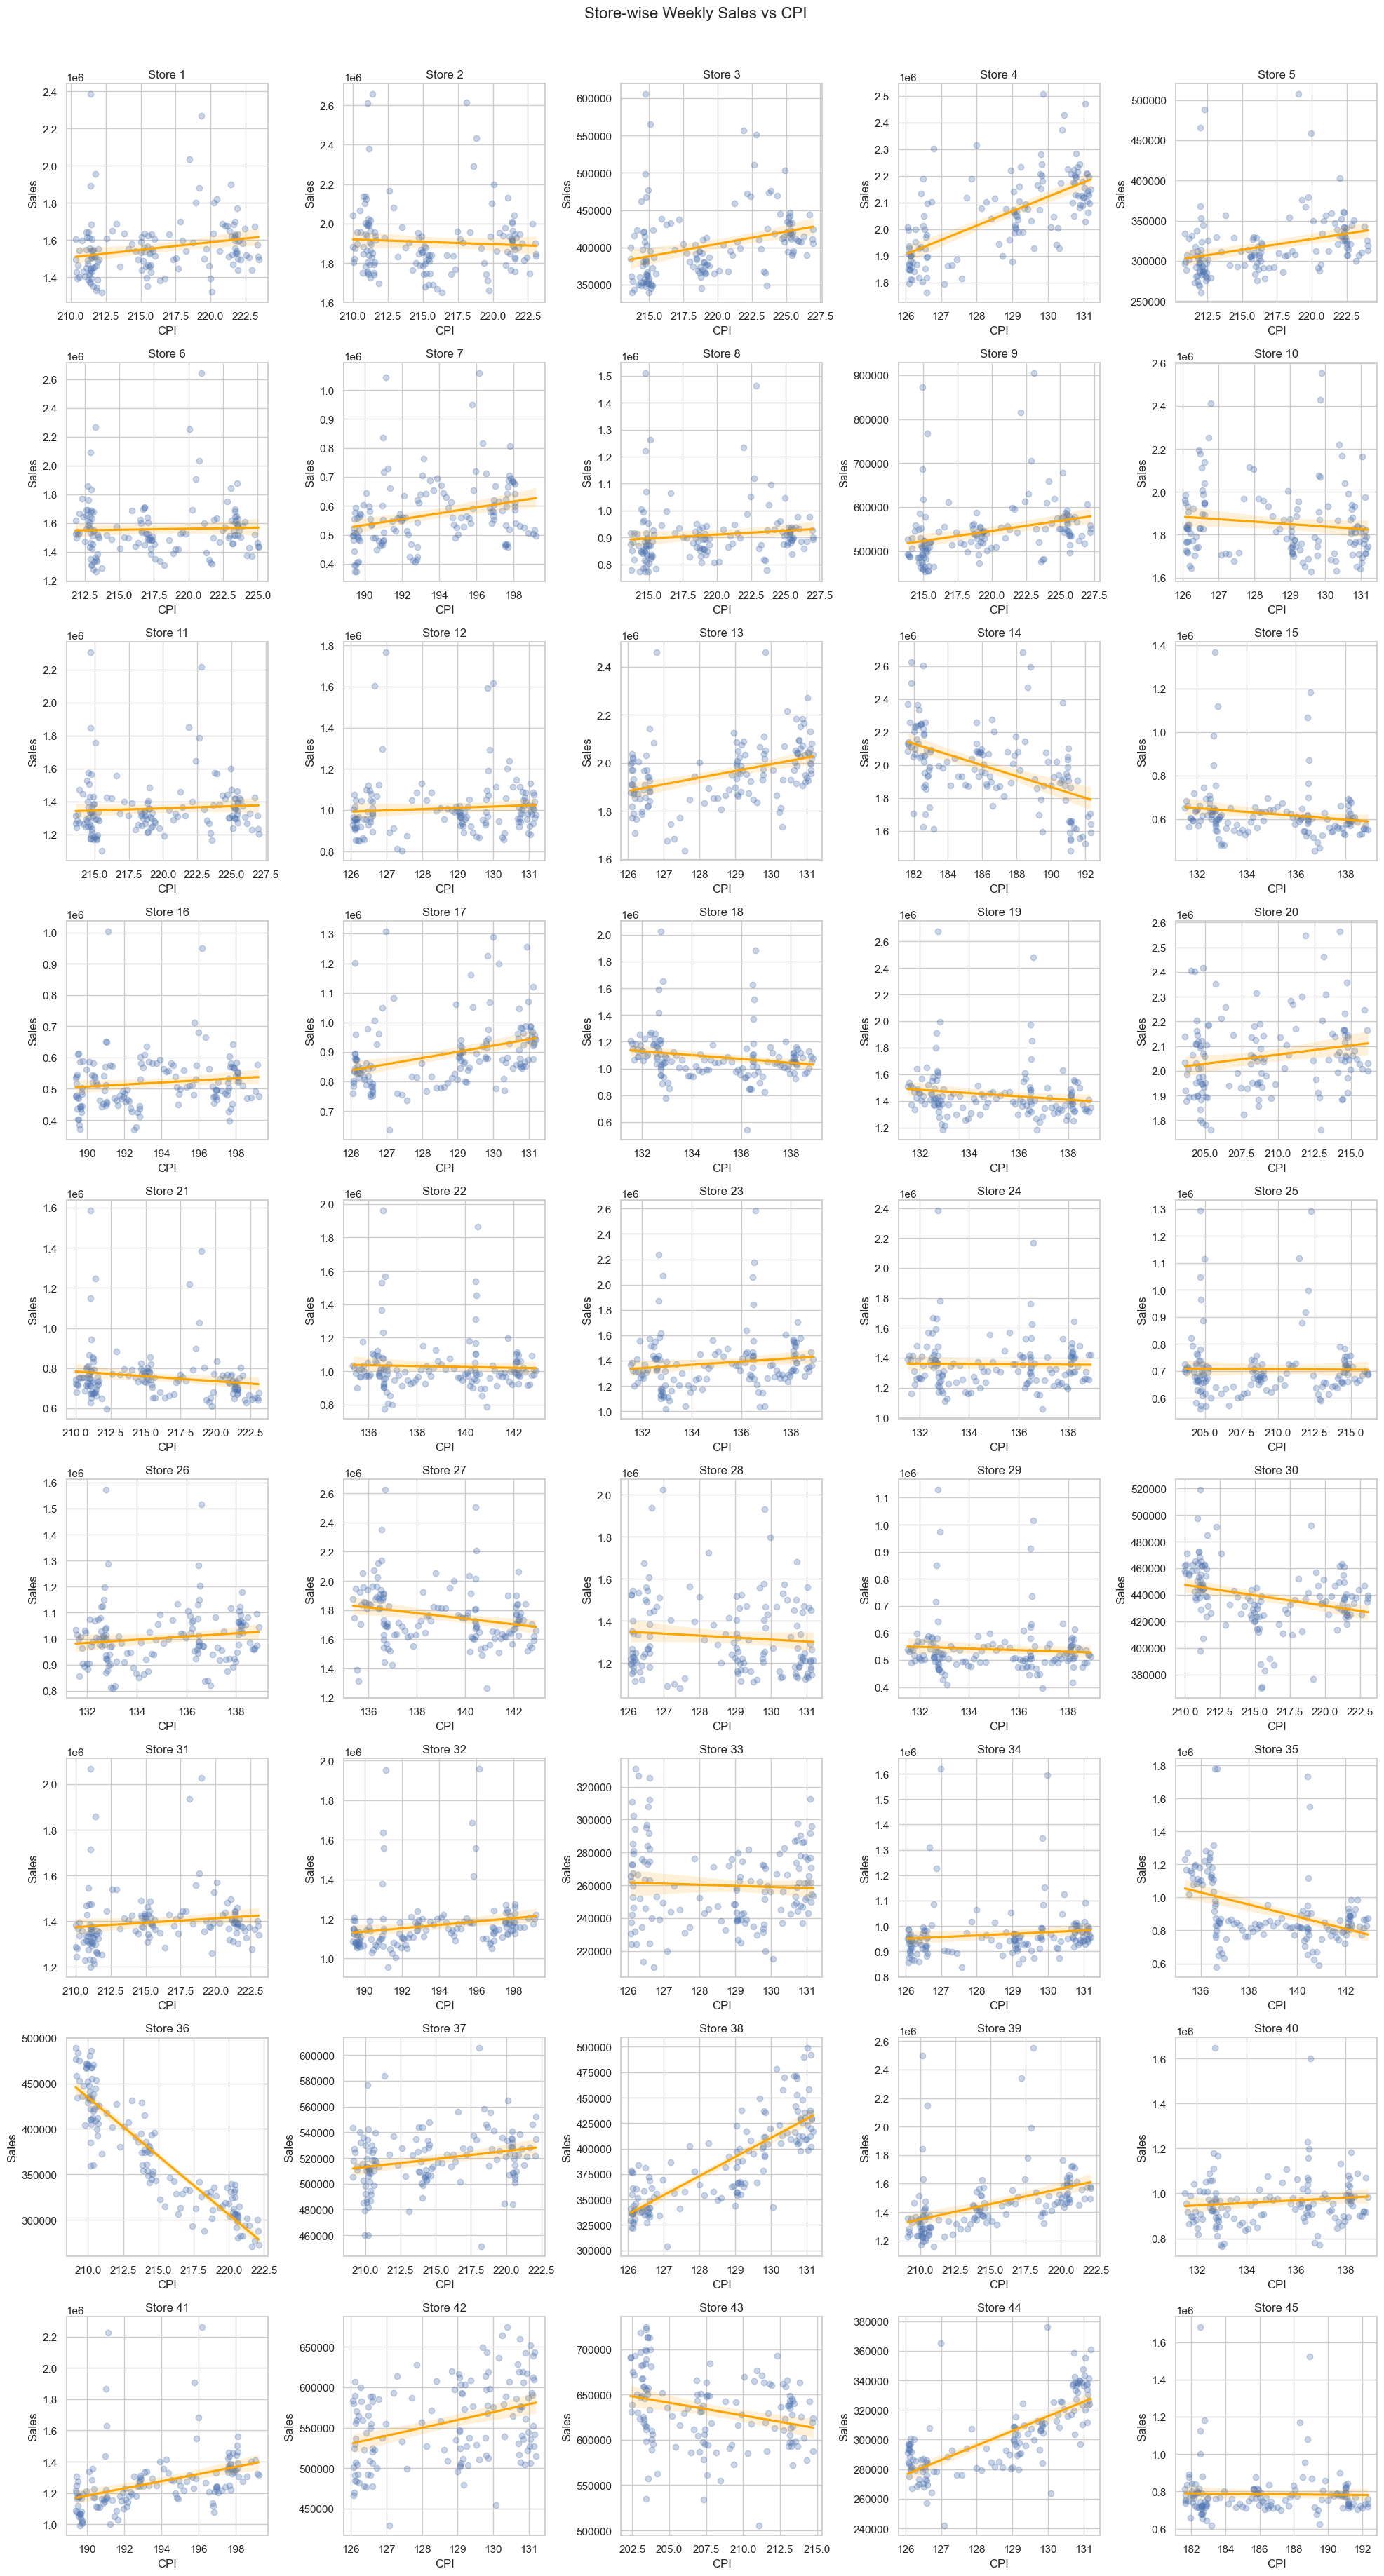

In [30]:
sns.set(style="whitegrid")
store_ids = sorted(df['Store'].unique())

n_stores = len(store_ids)
cols = 5
rows = n_stores // cols + int(n_stores % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

for i, store in enumerate(store_ids):
    store_data = df[df['Store'] == store]
    sns.regplot(
        x='CPI',
        y='Weekly_Sales',
        data=store_data,
        ax=axes[i],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'orange'}
    )
    axes[i].set_title(f"Store {store}")
    axes[i].set_xlabel("CPI")
    axes[i].set_ylabel("Sales")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Store-wise Weekly Sales vs CPI", fontsize=16, y=1.02)
plt.show()

**e. Top performing stores according to the historical data.**

Top 5 Performing Stores:
Store
4     2.810352e+08
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
Name: Weekly_Sales, dtype: float64


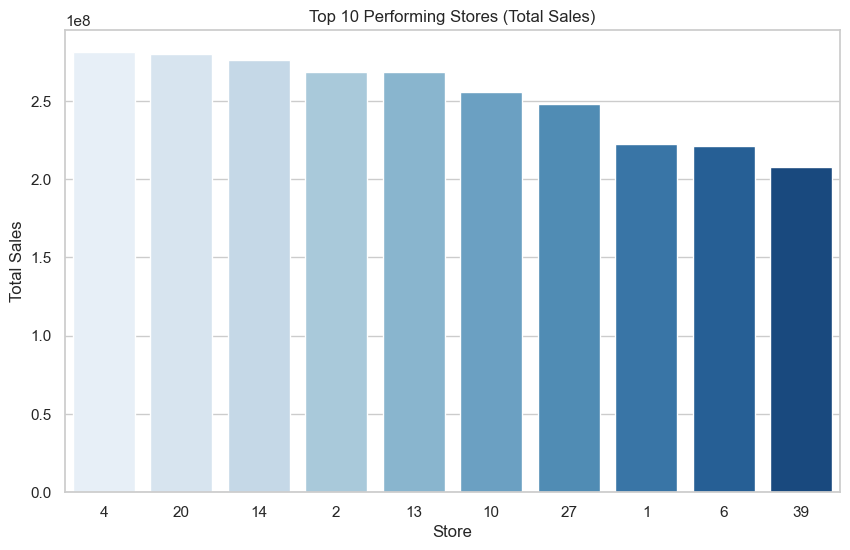

In [32]:

total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

print("Top 5 Performing Stores:")
print(total_sales.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales.head(10).index.astype(str), y=total_sales.head(10).values, palette='Blues')
plt.title("Top 10 Performing Stores (Total Sales)")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

**f. The worst performing store, and how significant is the difference between th 
 highest and lowest performing store**s.

In [34]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
worst_store = total_sales.index[0]
best_store = total_sales.index[-1]
worst_sales = total_sales.iloc[0]
best_sales = total_sales.iloc[-1]
print(f"Best Performing Store: Store {best_store} → ${best_sales:,.2f}")
print(f"Worst Performing Store: Store {worst_store} → ${worst_sales:,.2f}")
difference = best_sales - worst_sales
percent_diff = (difference / best_sales) * 100
print(f"\nDifference: ${difference:,.2f}")
print(f"Percentage Drop from Best to Worst: {percent_diff:.2f}%")

Best Performing Store: Store 4 → $281,035,224.92
Worst Performing Store: Store 33 → $37,160,221.96

Difference: $243,875,002.96
Percentage Drop from Best to Worst: 86.78%


**2. Use predictive modeling techniques to forecast the sales for each store for the next 12 week**s

In [104]:
# Load the dataset
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [105]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
store_dfs = {}
for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id].sort_values(by='Date').reset_index(drop=True)
    store_dfs[store_id] = store_df
print(f"Store 1 has {len(store_dfs[1])} rows")
print(store_dfs[1].head())

Store 1 has 143 rows
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [106]:
for store_id in store_dfs:
    store_dfs[store_id] = store_dfs[store_id][['Date', 'Weekly_Sales']]

In [107]:
print(store_dfs[1].head())

        Date  Weekly_Sales
0 2010-02-05    1643690.90
1 2010-02-12    1641957.44
2 2010-02-19    1611968.17
3 2010-02-26    1409727.59
4 2010-03-05    1554806.68


In [108]:
for store_id in store_dfs:
    store_dfs[store_id].set_index('Date', inplace=True)
    store_dfs[store_id].sort_index(inplace=True) 

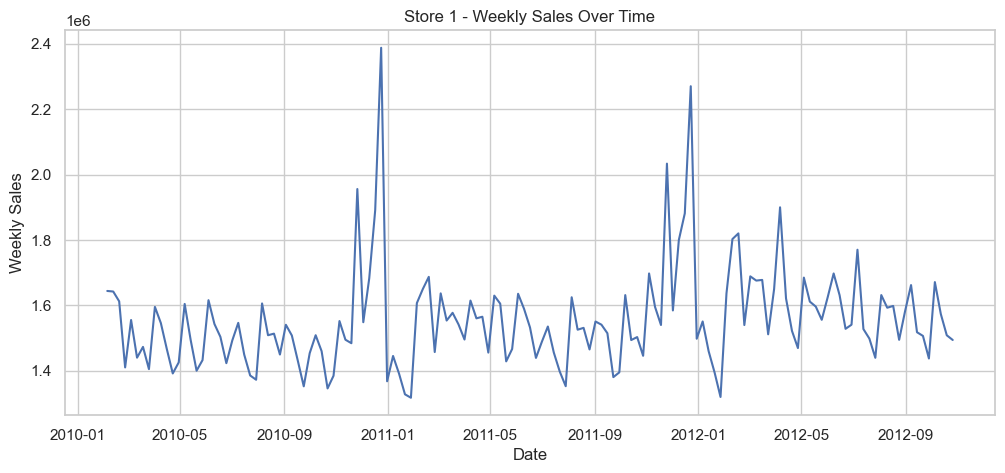

In [109]:
store_id = 1
store_ts = store_dfs[store_id]['Weekly_Sales']

plt.figure(figsize=(12, 5))/
plt.plot(store_ts)
plt.title(f"Store {store_id} - Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

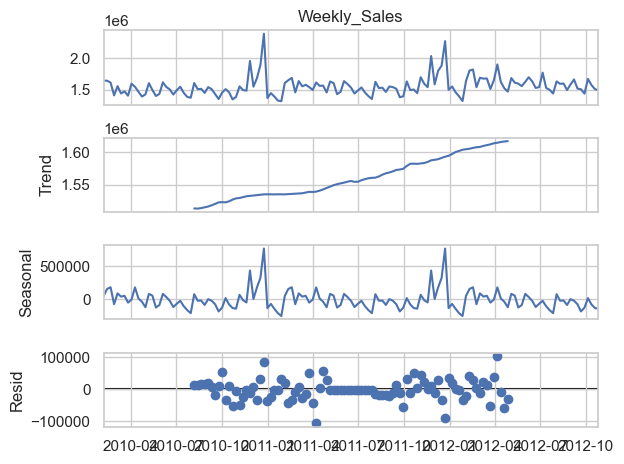

<Figure size 3000x200 with 0 Axes>

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_ts, model='additive', period=52)  # 52 weeks in a year
result.plot()
plt.figure(figsize = (30,2))
plt.suptitle(f"Store {store_id} - Seasonal Decomposition", fontsize=16)
plt.show()

In [111]:
from statsmodels.tsa.stattools import adfuller

store_id = 1
series = store_dfs[store_id]['Weekly_Sales']

result = adfuller(series.dropna())

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if result[1] <= 0.05:
    print("The series is stationary (no differencing needed)")
else:
    print("The series is NOT stationary (d=1 needed in ARIMA)")


ADF Statistic: -5.1022
p-value: 0.0000
Critical Value (1%): -3.4786
Critical Value (5%): -2.8827
Critical Value (10%): -2.5781
The series is stationary (no differencing needed)


In [112]:
!pip install pmdarima

In [113]:
from pmdarima import auto_arima


store_id = 1
series = store_dfs[store_id]['Weekly_Sales']

model_auto = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
print(f"Best ARIMA order for Store {store_id}: {model_auto.order}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(series, order=(2,1,3), seasonal_order=(1,1,1,52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)



In [115]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=series.index[-1] , periods=forecast_steps, freq='W')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Store': store_id,
    'Forecast_Weekly_Sales': forecast
})

print(forecast_df)


                 Date  Store  Forecast_Weekly_Sales
2012-11-02 2012-10-28      1           1.699134e+06
2012-11-09 2012-11-04      1           1.613142e+06
2012-11-16 2012-11-11      1           1.570327e+06
2012-11-23 2012-11-18      1           1.979988e+06
2012-11-30 2012-11-25      1           1.608030e+06
2012-12-07 2012-12-02      1           1.781941e+06
2012-12-14 2012-12-09      1           1.857668e+06
2012-12-21 2012-12-16      1           2.188195e+06
2012-12-28 2012-12-23      1           1.525509e+06
2013-01-04 2012-12-30      1           1.569845e+06
2013-01-11 2013-01-06      1           1.486213e+06
2013-01-18 2013-01-13      1           1.445273e+06


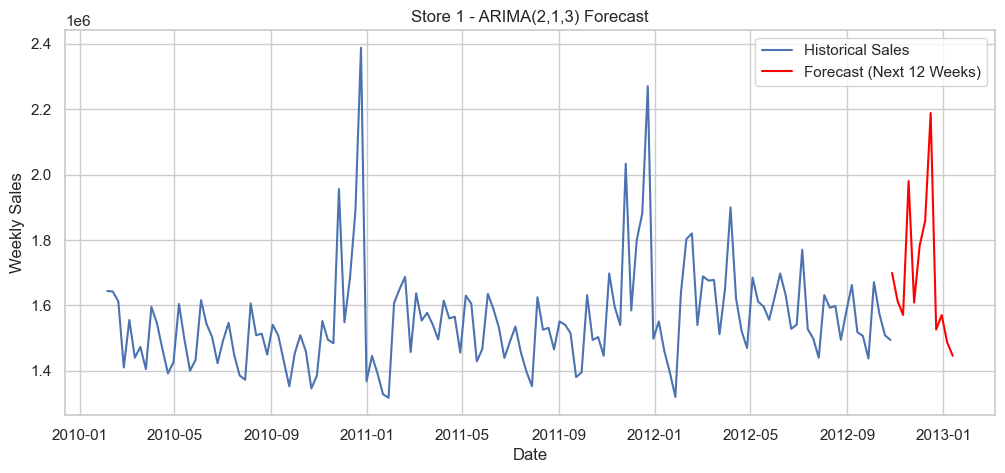

In [116]:
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast (Next 12 Weeks)', color='red')
plt.title(f"Store {store_id} - ARIMA(2,1,3) Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


**Building model for 5 stores**
* For store 1 we build and forcast.
*  **Store 2**

Store 2 has 143 rows
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      2 2010-02-05    2136989.46             0        40.19       2.572   
1      2 2010-02-12    2137809.50             1        38.49       2.548   
2      2 2010-02-19    2124451.54             0        39.69       2.514   
3      2 2010-02-26    1865097.27             0        46.10       2.561   
4      2 2010-03-05    1991013.13             0        47.17       2.625   

          CPI  Unemployment  
0  210.752605         8.324  
1  210.897994         8.324  
2  210.945160         8.324  
3  210.975957         8.324  
4  211.006754         8.324  


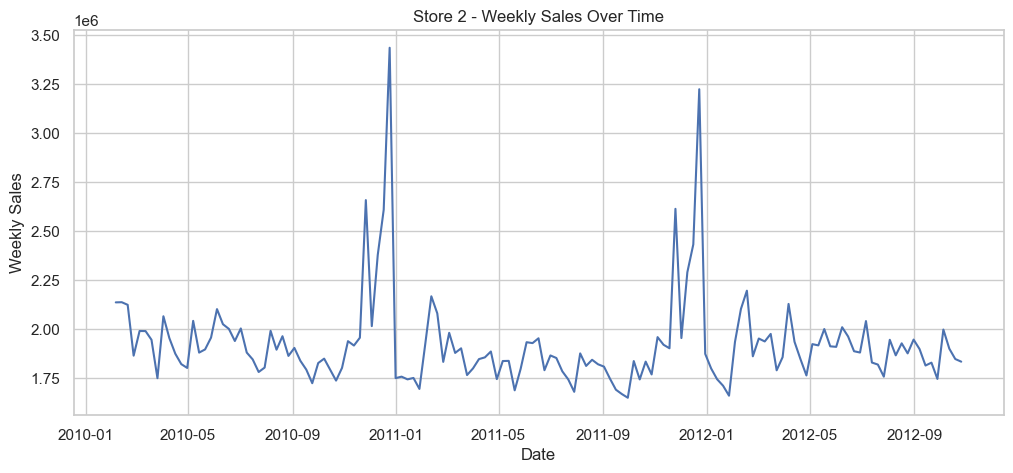

In [118]:
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
store_dfs = {}
for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id].sort_values(by='Date').reset_index(drop=True)
    store_dfs[store_id] = store_df
print(f"Store 2 has {len(store_dfs[2])} rows")
print(store_dfs[2].head())
for store_id in store_dfs:
    store_dfs[store_id] = store_dfs[store_id][['Date', 'Weekly_Sales']]
for store_id in store_dfs:
    store_dfs[store_id].set_index('Date', inplace=True)
    store_dfs[store_id].sort_index(inplace=True)

store_id = 2
store_ts = store_dfs[store_id]['Weekly_Sales']

plt.figure(figsize=(12, 5))
plt.plot(store_ts)
plt.title(f"Store {store_id} - Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

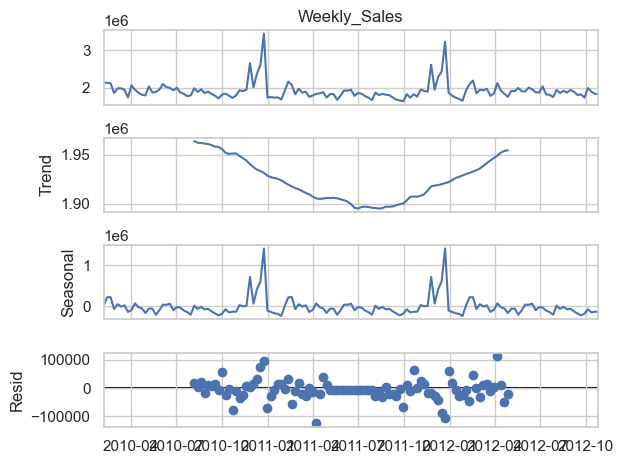

<Figure size 3000x200 with 0 Axes>

ADF Statistic: -3.7089
p-value: 0.0040
Critical Value (1%): -3.4794
Critical Value (5%): -2.8830
Critical Value (10%): -2.5782
The series is stationary (no differencing needed)


In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_ts, model='additive', period=52)
result.plot()
plt.figure(figsize = (30,2))
plt.suptitle(f"Store {store_id} - Seasonal Decomposition", fontsize=16)
plt.show()
from statsmodels.tsa.stattools import adfuller

store_id = 2
series = store_dfs[store_id]['Weekly_Sales']

result = adfuller(series.dropna())

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if result[1] <= 0.05:
    print("The series is stationary (no differencing needed)")
else:
    print("The series is NOT stationary (d=1 needed in ARIMA)")


In [120]:
from pmdarima import auto_arima


store_id = 2
series = store_dfs[store_id]['Weekly_Sales']

model_auto = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
print(f"Best ARIMA order for Store {store_id}: {model_auto.order}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4548.620, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4455.918, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3951.295, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4428.849, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3929.668, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3935.339, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3928.410, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3949.120, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3928.730, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3930.637, Time=0

In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(series, order=(1,0,0), seasonal_order=(1,1,1,52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=series.index[-1] , periods=forecast_steps, freq='W')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Store': store_id,
    'Forecast_Weekly_Sales': forecast
})

print(forecast_df)

                 Date  Store  Forecast_Weekly_Sales
2012-11-02 2012-10-28      2           2.028726e+06
2012-11-09 2012-11-04      2           1.989527e+06
2012-11-16 2012-11-11      2           1.975167e+06
2012-11-23 2012-11-18      2           2.711505e+06
2012-11-30 2012-11-25      2           2.029736e+06
2012-12-07 2012-12-02      2           2.379412e+06
2012-12-14 2012-12-09      2           2.533187e+06
2012-12-21 2012-12-16      2           3.355880e+06
2012-12-28 2012-12-23      2           1.932564e+06
2013-01-04 2012-12-30      2           1.861209e+06
2013-01-11 2013-01-06      2           1.807452e+06
2013-01-18 2013-01-13      2           1.776125e+06


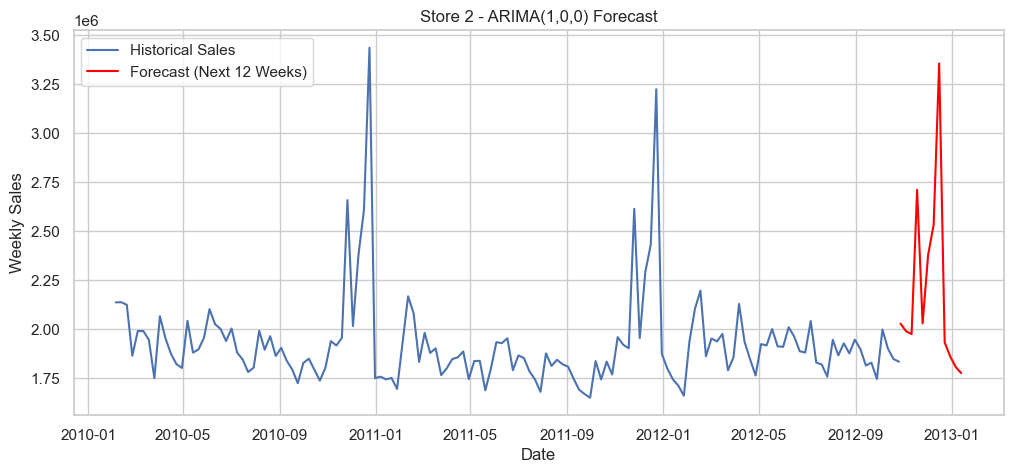

In [122]:
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast (Next 12 Weeks)', color='red')
plt.title(f"Store {store_id} - ARIMA(1,0,0) Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

**Store 3**

Store 3 has 143 rows
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      3 2010-02-05     461622.22             0        45.71       2.572   
1      3 2010-02-12     420728.96             1        47.93       2.548   
2      3 2010-02-19     421642.19             0        47.07       2.514   
3      3 2010-02-26     407204.86             0        52.05       2.561   
4      3 2010-03-05     415202.04             0        53.04       2.625   

          CPI  Unemployment  
0  214.424881         7.368  
1  214.574792         7.368  
2  214.619887         7.368  
3  214.647513         7.368  
4  214.675139         7.368  


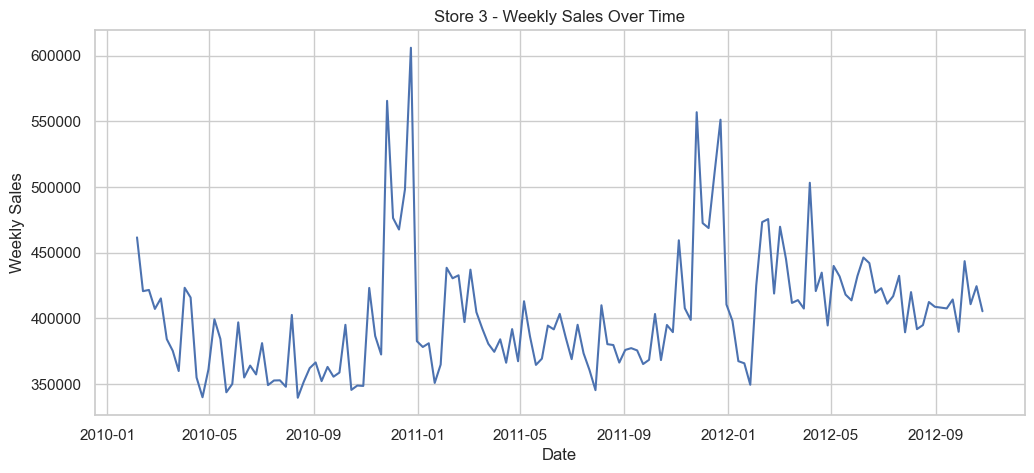

In [124]:
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
store_dfs = {}
for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id].sort_values(by='Date').reset_index(drop=True)
    store_dfs[store_id] = store_df
print(f"Store 3 has {len(store_dfs[3])} rows")
print(store_dfs[3].head())
for store_id in store_dfs:
    store_dfs[store_id] = store_dfs[store_id][['Date', 'Weekly_Sales']]
for store_id in store_dfs:
    store_dfs[store_id].set_index('Date', inplace=True)
    store_dfs[store_id].sort_index(inplace=True)

store_id = 3
store_ts = store_dfs[store_id]['Weekly_Sales']

plt.figure(figsize=(12, 5))
plt.plot(store_ts)
plt.title(f"Store {store_id} - Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

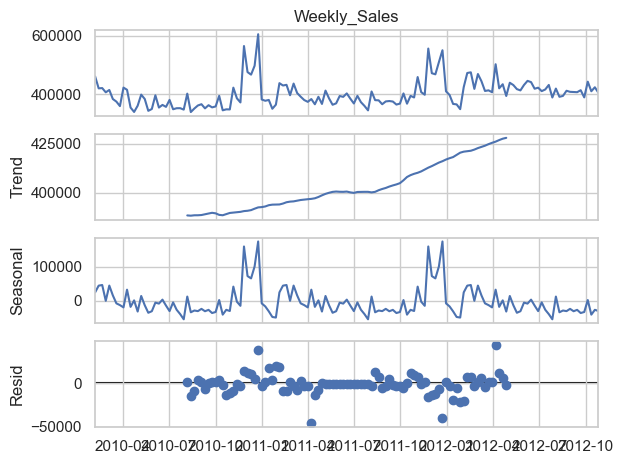

<Figure size 3000x200 with 0 Axes>

ADF Statistic: -2.9639
p-value: 0.0384
Critical Value (1%): -3.4794
Critical Value (5%): -2.8830
Critical Value (10%): -2.5782
The series is stationary (no differencing needed)


In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_ts, model='additive', period=52)
result.plot()
plt.figure(figsize = (30,2))
plt.suptitle(f"Store {store_id} - Seasonal Decomposition", fontsize=16)
plt.show()
from statsmodels.tsa.stattools import adfuller

store_id = 3
series = store_dfs[store_id]['Weekly_Sales']

result = adfuller(series.dropna())

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if result[1] <= 0.05:
    print("The series is stationary (no differencing needed)")
else:
    print("The series is NOT stationary (d=1 needed in ARIMA)")

In [126]:
from pmdarima import auto_arima

series = store_dfs[store_id]['Weekly_Sales']

model_auto = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
print(f"Best ARIMA order for Store {store_id}: {model_auto.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3427.286, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3448.550, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3435.218, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3429.846, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3446.564, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3425.509, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3429.113, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3426.121, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3430.518, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3430.138, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3426.738, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3424.038, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3427.225, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=series.index[-1] , periods=forecast_steps, freq='W')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Store': store_id,
    'Forecast_Weekly_Sales': forecast
})

print(forecast_df)

                 Date  Store  Forecast_Weekly_Sales
2012-11-02 2012-10-28      3          466092.664133
2012-11-09 2012-11-04      3          426574.590382
2012-11-16 2012-11-11      3          418733.487335
2012-11-23 2012-11-18      3          551436.661635
2012-11-30 2012-11-25      3          482387.947883
2012-12-07 2012-12-02      3          478706.389258
2012-12-14 2012-12-09      3          511264.459176
2012-12-21 2012-12-16      3          552771.016212
2012-12-28 2012-12-23      3          428039.281706
2013-01-04 2012-12-30      3          419034.350675
2013-01-11 2013-01-06      3          398581.591585
2013-01-18 2013-01-13      3          394746.711880


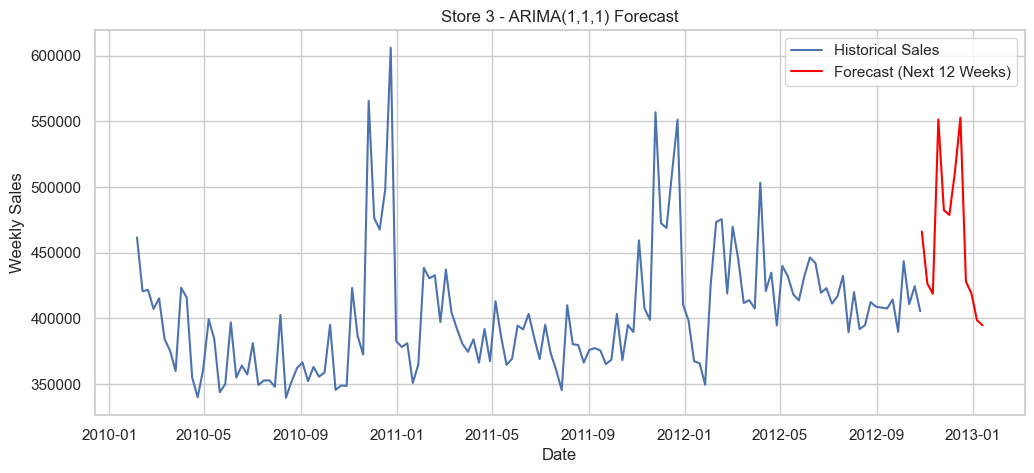

In [128]:
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast (Next 12 Weeks)', color='red')
plt.title(f"Store {store_id} - ARIMA(1,1,1) Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

**Store 4**

Store 4 has 143 rows
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      4 2010-02-05    2135143.87             0        43.76       2.598   
1      4 2010-02-12    2188307.39             1        28.84       2.573   
2      4 2010-02-19    2049860.26             0        36.45       2.540   
3      4 2010-02-26    1925728.84             0        41.36       2.590   
4      4 2010-03-05    1971057.44             0        43.49       2.654   

          CPI  Unemployment  
0  126.442065         8.623  
1  126.496258         8.623  
2  126.526286         8.623  
3  126.552286         8.623  
4  126.578286         8.623  


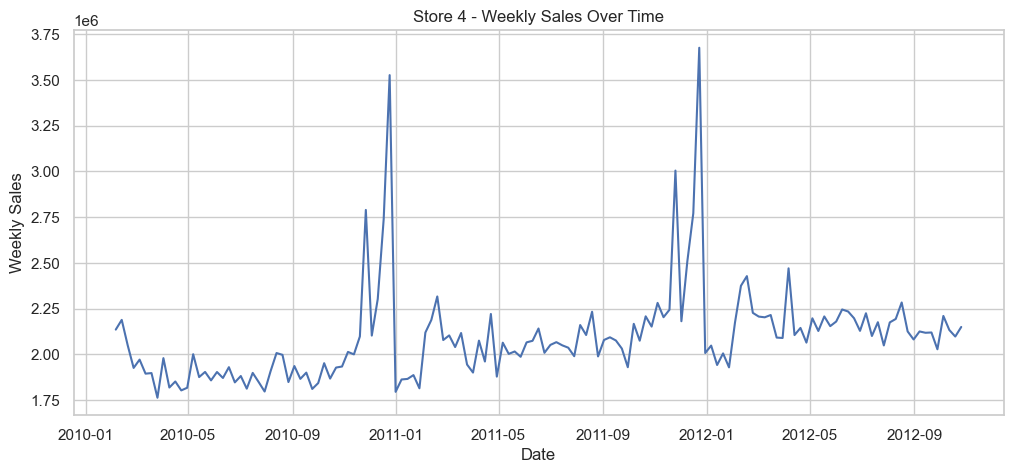

In [153]:
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
store_dfs = {}
for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id].sort_values(by='Date').reset_index(drop=True)
    store_dfs[store_id] = store_df
print(f"Store 4 has {len(store_dfs[4])} rows")
print(store_dfs[4].head())
for store_id in store_dfs:
    store_dfs[store_id] = store_dfs[store_id][['Date', 'Weekly_Sales']]
for store_id in store_dfs:
    store_dfs[store_id].set_index('Date', inplace=True)
    store_dfs[store_id].sort_index(inplace=True)

store_id = 4
store_ts = store_dfs[store_id]['Weekly_Sales']

plt.figure(figsize=(12, 5))
plt.plot(store_ts)
plt.title(f"Store {store_id} - Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

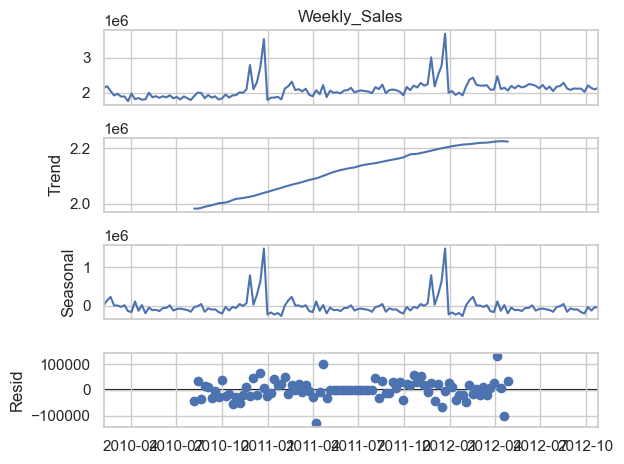

<Figure size 3000x200 with 0 Axes>

ADF Statistic: -2.8794
p-value: 0.0478
Critical Value (1%): -3.4794
Critical Value (5%): -2.8830
Critical Value (10%): -2.5782
The series is stationary (no differencing needed)


In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_ts, model='additive', period=52)
result.plot()
plt.figure(figsize = (30,2))
plt.suptitle(f"Store {store_id} - Seasonal Decomposition", fontsize=16)
plt.show()
from statsmodels.tsa.stattools import adfuller

series = store_dfs[store_id]['Weekly_Sales']

result = adfuller(series.dropna())

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if result[1] <= 0.05:
    print("The series is stationary (no differencing needed)")
else:
    print("The series is NOT stationary (d=1 needed in ARIMA)")

In [157]:
from pmdarima import auto_arima

series = store_dfs[store_id]['Weekly_Sales']

model_auto = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
print(f"Best ARIMA order for Store {store_id}: {model_auto.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3941.121, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3974.839, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3961.185, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3951.001, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3972.843, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3942.458, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3943.328, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3933.917, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3934.872, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3934.829, Time=0.41 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3935.308, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3935.805, Time=0.28 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3936.191, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0]             : 

In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(series, order=(2,1,3), seasonal_order=(1,1,1,52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=series.index[-1] , periods=forecast_steps, freq='W')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Store': store_id,
    'Forecast_Weekly_Sales': forecast
})

print(forecast_df)

                 Date  Store  Forecast_Weekly_Sales
2012-11-02 2012-10-28      4           2.284458e+06
2012-11-09 2012-11-04      4           2.213902e+06
2012-11-16 2012-11-11      4           2.231100e+06
2012-11-23 2012-11-18      4           2.900472e+06
2012-11-30 2012-11-25      4           2.139098e+06
2012-12-07 2012-12-02      4           2.446111e+06
2012-12-14 2012-12-09      4           2.708921e+06
2012-12-21 2012-12-16      4           3.548897e+06
2012-12-28 2012-12-23      4           2.020865e+06
2013-01-04 2012-12-30      4           2.043889e+06
2013-01-11 2013-01-06      4           1.933548e+06
2013-01-18 2013-01-13      4           1.987599e+06


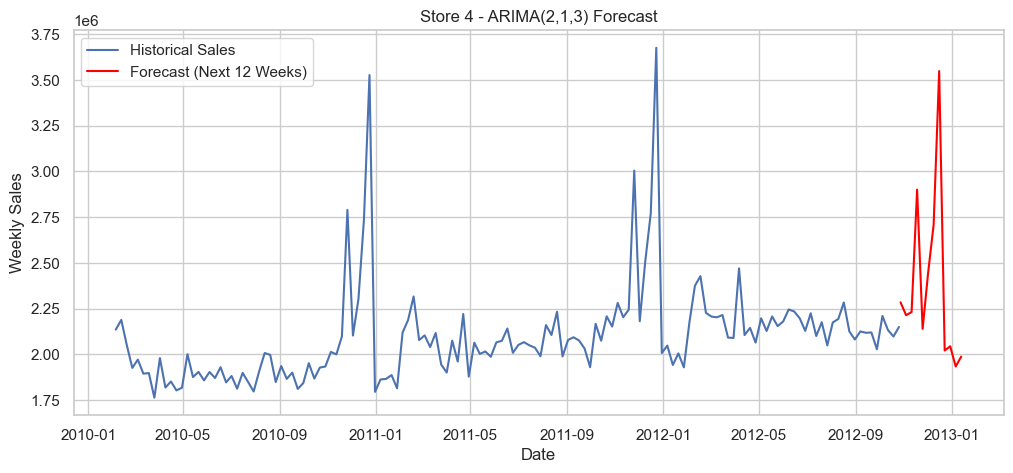

In [161]:
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast (Next 12 Weeks)', color='red')
plt.title(f"Store {store_id} - ARIMA(2,1,3) Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

**Store 5**

Store 5 has 143 rows
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      5 2010-02-05     317173.10             0        39.70       2.572   
1      5 2010-02-12     311825.70             1        39.81       2.548   
2      5 2010-02-19     303447.57             0        41.14       2.514   
3      5 2010-02-26     270281.63             0        46.70       2.561   
4      5 2010-03-05     288855.71             0        48.89       2.625   

          CPI  Unemployment  
0  211.653972         6.566  
1  211.800470         6.566  
2  211.847128         6.566  
3  211.877147         6.566  
4  211.907165         6.566  


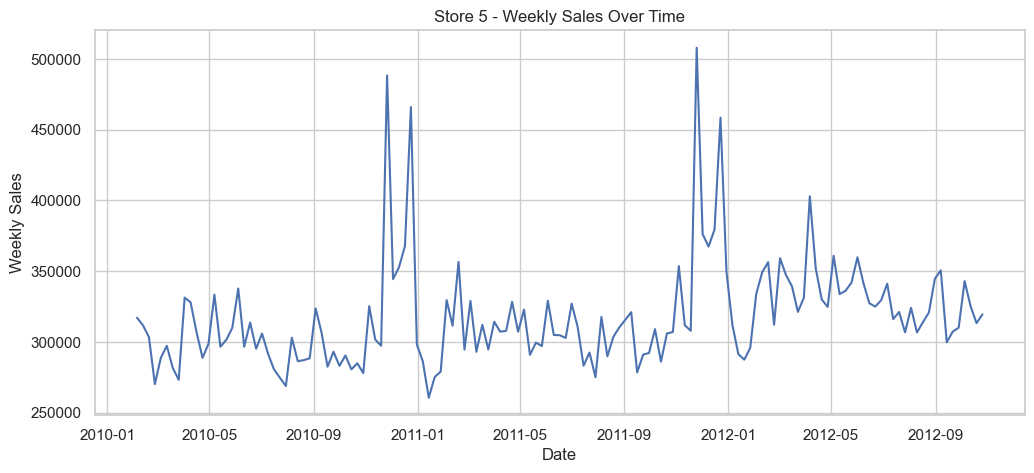

In [166]:
df = pd.read_csv(r"E:\Drive\Stats in my heart (Rudra)\Project\Walmart-Project\Walmart DataSet\Walmart DataSet.csv")
df
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
store_dfs = {}
for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id].sort_values(by='Date').reset_index(drop=True)
    store_dfs[store_id] = store_df
print(f"Store 5 has {len(store_dfs[5])} rows")
print(store_dfs[5].head())
for store_id in store_dfs:
    store_dfs[store_id] = store_dfs[store_id][['Date', 'Weekly_Sales']]
for store_id in store_dfs:
    store_dfs[store_id].set_index('Date', inplace=True)
    store_dfs[store_id].sort_index(inplace=True)

store_id = 5
store_ts = store_dfs[store_id]['Weekly_Sales']

plt.figure(figsize=(12, 5))
plt.plot(store_ts)
plt.title(f"Store {store_id} - Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

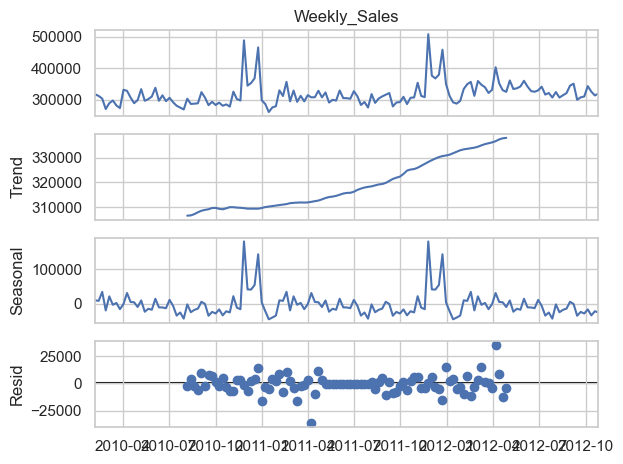

<Figure size 3000x200 with 0 Axes>

ADF Statistic: -4.3110
p-value: 0.0004
Critical Value (1%): -3.4786
Critical Value (5%): -2.8827
Critical Value (10%): -2.5781
The series is stationary (no differencing needed)


In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_ts, model='additive', period=52)
result.plot()
plt.figure(figsize = (30,2))
plt.suptitle(f"Store {store_id} - Seasonal Decomposition", fontsize=16)
plt.show()
from statsmodels.tsa.stattools import adfuller

series = store_dfs[store_id]['Weekly_Sales']

result = adfuller(series.dropna())

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if result[1] <= 0.05:
    print("The series is stationary (no differencing needed)")
else:
    print("The series is NOT stationary (d=1 needed in ARIMA)")

In [170]:
from pmdarima import auto_arima

series = store_dfs[store_id]['Weekly_Sales']

model_auto = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
print(f"Best ARIMA order for Store {store_id}: {model_auto.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3427.452, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3410.502, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3400.127, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3425.456, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3397.113, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3398.646, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3398.543, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3398.442, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3405.850, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3395.851, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3398.350, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3408.507, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3397.068, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=series.index[-1] , periods=forecast_steps, freq='W')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Store': store_id,
    'Forecast_Weekly_Sales': forecast
})

print(forecast_df)

                 Date  Store  Forecast_Weekly_Sales
2012-11-02 2012-10-28      5          359194.051597
2012-11-09 2012-11-04      5          326169.077947
2012-11-16 2012-11-11      5          322932.459303
2012-11-23 2012-11-18      5          488021.157240
2012-11-30 2012-11-25      5          378040.640186
2012-12-07 2012-12-02      5          371976.557211
2012-12-14 2012-12-09      5          382211.632971
2012-12-21 2012-12-16      5          449079.310940
2012-12-28 2012-12-23      5          354621.603733
2013-01-04 2012-12-30      5          325464.753709
2013-01-11 2013-01-06      5          308511.028127
2013-01-18 2013-01-13      5          308481.167438


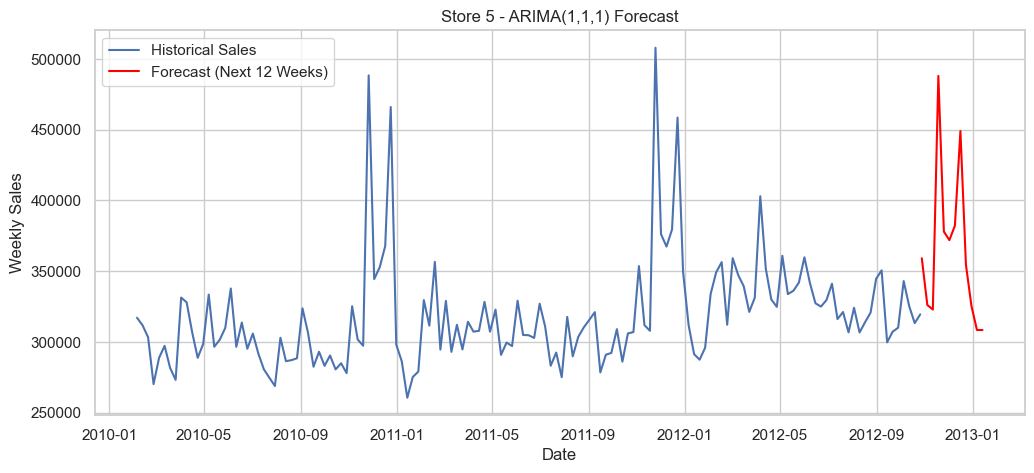

In [174]:
plt.figure(figsize=(12, 5))
plt.plot(series, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast (Next 12 Weeks)', color='red')
plt.title(f"Store {store_id} - ARIMA(1,1,1) Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()